# <center> Kidney Disease Screening and Patient Analysis</center>
<center>By: Louis Farer</center>
<center>CHIP 490-335 Introduction to Programming</center>
<center>Professor Alex Harding </center>

*Disclaimer: This is an academic exercise utilitizing fake patient data.*

## Introduction
The estimted glomerular filtration rate (*eGFR*), measures the rate that kidneys filter out waste from the bloodstream. It is calculated based on a patient's creatinine level from the complete metabolic panel, their age, and their sex. In this study, we are screening to determine if which patients in the study are at risk of kidney disease: when their eGFR is less than or equal to **65** mL/min/1.73 meters squared.

After screening for the patinets, we will examine statistics on patients determined to be at risk for kidney disease based their eGFR values.

## Patient Makeup: Age, Height, and Weight

Below, patients determined to be at risk for kidney disease are separated from the larger patient pool. Descriptive statistics are shown below regarding the age, height, and weight of the patients that were screened. The average age of the patients in 41, with the middle 50% of pateints in the range of *29-56*. The average height of these patients is *72.63* inches, or *6' tall*, with the middle 50% of patients in the range of *65-79* inches, or *5'5-6'9* tall . Lastly, the average weight is *221.9* lbs, with the middle 50% of patients within the range of *194-247* lbs.

In [5]:
import datafiles
import statistics as stats
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table
import calculations


data = datafiles.merge_table()

table = Table(title="[b]Descriptive Statistics of Selected Patients")
table.add_column("Statistic")
table.add_column("Age")
table.add_column("Height (in)")
table.add_column("Weight (lbs)")

table.add_row("Mean", calculations.mean_calc(data, "age"), calculations.mean_calc(data, "height_inches"),calculations.mean_calc(data, "weight_lbs") )
table.add_row("Standard Deviation", calculations.standard_deviation(data, "age"), calculations.standard_deviation(data, "height_inches"),calculations.standard_deviation(data, "weight_lbs") )
table.add_row("Minimum", str(min(data["age"])), str(min(data["height_inches"])),str(min(data["weight_lbs"])))
table.add_row("First Quartile", str(int(data["age"].quantile(0.25))), str(int(data["height_inches"].quantile(0.25))), str(int(data["weight_lbs"].quantile(0.25))))
table.add_row("Median", str(stats.median(data["age"])), str(stats.median(data["height_inches"])), str(stats.median(data["weight_lbs"])))
table.add_row("Third Quartile", str(int(data["age"].quantile(0.75))), str(int(data["height_inches"].quantile(0.75))), str(int(data["weight_lbs"].quantile(0.75))))
table.add_row("Maximum", str(max(data["age"])), str(max(data["height_inches"])),str(max(data["weight_lbs"])))

console = Console()
console.print(table)

        Descriptive Statistics of Selected Patients        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Statistic          ┃ Age   ┃ Height (in) ┃ Weight (lbs) ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ Mean               │ 41.44 │ 72.63       │ 221.9        │
│ Standard Deviation │ 14.62 │ 7.42        │ 38.82        │
│ Minimum            │ 18    │ 61          │ 144          │
│ First Quartile     │ 29    │ 65          │ 194          │
│ Median             │ 40    │ 73          │ 224          │
│ Third Quartile     │ 56    │ 79          │ 247          │
│ Maximum            │ 64    │ 84          │ 298          │
└────────────────────┴───────┴─────────────┴──────────────┘

## Comparing eGFR and BMI

After sorting the patients into BMI categories based on their height and weight, the average eGFR per category was calculated. In the histogram below, the eGFR means for each BMI category are compared. The *underweight* BMI category has the highest mean eGFR at *~65*, and the other BMI catgories have similar eGFR means at *~50*. 

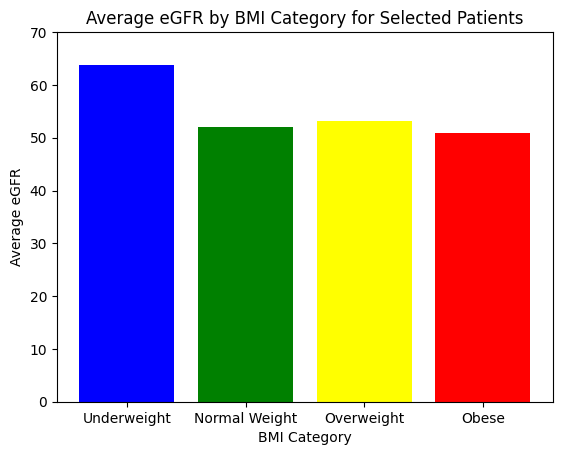

In [6]:
underweight = data.loc[data["BMI"] <=18.5, "eGFR"]
underweight_mean = stats.mean(underweight)
normal_weight = data.loc[(data["BMI"]<24.9) & (data["BMI"]>18.5), "eGFR"]
normal_mean = stats.mean(normal_weight)
overweight = data.loc[(data["BMI"]<29.9) & (data["BMI"]>25), "eGFR"]
overweight_mean = stats.mean(overweight)
obese = data.loc[data["BMI"]>30, "eGFR"]
obese_mean = stats.mean(obese)

bmi_categories = ["Underweight", "Normal Weight", "Overweight", "Obese"]
means = [underweight_mean, normal_mean, overweight_mean, obese_mean]
colors = ["blue", "green", "yellow", "red"]

plt.bar(bmi_categories, means, color=colors)
plt.xlabel("BMI Category")
plt.ylabel("Average eGFR")
plt.title("Average eGFR by BMI Category for Selected Patients")
plt.ylim(0,70)
plt.show()


## Comparing Age and eGFR

Next, we compare the relationship between age and eGFR on the screened patients. As seen in the scatterplot below, there is **_no correlation_** between age and eGFR, as the distributino of patients is relatively similar across the ages of 18-70 and eGFR of 30-65.

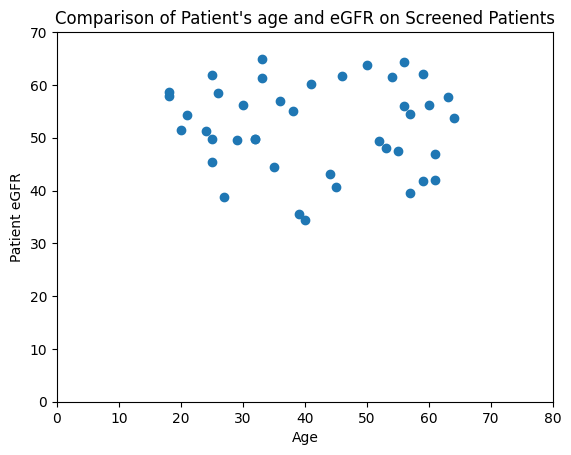

In [7]:
fig, ax = plt.subplots()

ax.scatter(data['age'], data['eGFR'])
ax.set_title("Comparison of Patient's age and eGFR on Screened Patients")
ax.set_xlabel("Age")
ax.set_ylabel("Patient eGFR")
ax.set_xlim(0,80)
ax.set_ylim(0,70)
plt.show()


## Sex Makeup of Screened Patients

Lastly, we take a look at the sex distribution of the screened patients. Of the 41 patients determined to be at risk of kidney disease, *61%* are male and *39%* are female.

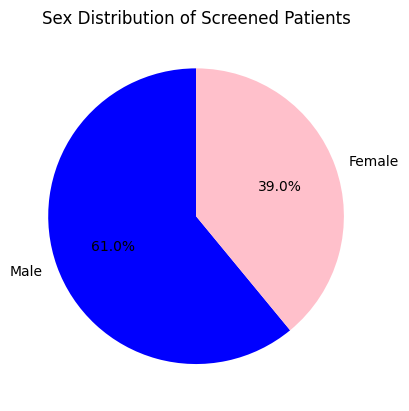

In [8]:
sex_counts = data["sex"].value_counts()
colors = ["blue", "pink"]
mylabels = ["Male", "Female"]
plt.pie(sex_counts, labels=mylabels, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Sex Distribution of Screened Patients")
plt.show()


## Conclusion

In this study, we have compared eGFR values of patients at risk of kidney disease to their ages and BMIS. We determined that patients with "Underweight" BMIs had higher average eGFR measurements than patients in all other BMI categories. There was no relationship noticeable between the patients ages and eGFR measures as seen on the scatterplot. Lastly, we determined that the patient makeup of screened patients was male-dominated at 61% male patients.